I collaborated with Euan Miles on this homework for the uniform distributions part of question 5.

In [3]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import scipy.stats as stats
import pandas as pd
import glob

# Visual evaluation

## Restructuring previous homework code into a function

In [24]:
def GetPierData(variables):
    """
    This function creates a dataset of all requested variables at the Scripps Pier station from 2005-2021.
    """

    filenames = glob.glob('scripps_pier*') # Collecting all filenames

    ds_list = [] # Empty list to put each year's dataset in
    for f in filenames:
        # Looping over all files
        ds = xr.open_dataset(f) # xarray package reads netCDF files
        ds = ds[variables] # selecting only variables specified in function input
        time_fixed = [np.datetime64(ti) for ti in ds.time.data] # converting time coordinate to datetime64 format
        ds['time'] = time_fixed
        ds_list.append(ds) # Appending each year to ds_list
        
    ds_combined = xr.concat(ds_list, dim='time') # Combining all years into one big dataset
    
    return ds_combined

In [26]:
ds = GetPierData(variables=['temperature','pressure']) 

In [87]:
ds_2016 = ds.sel(time=ds.time.dt.year==2016)
ds_2019 = ds.sel(time=ds.time.dt.year==2019)

pres_2016 = ds_2016.pressure
sst_2016 = ds_2016.temperature

pres_2019 = ds_2019.pressure
sst_2019 = ds_2019.temperature

## Pressure

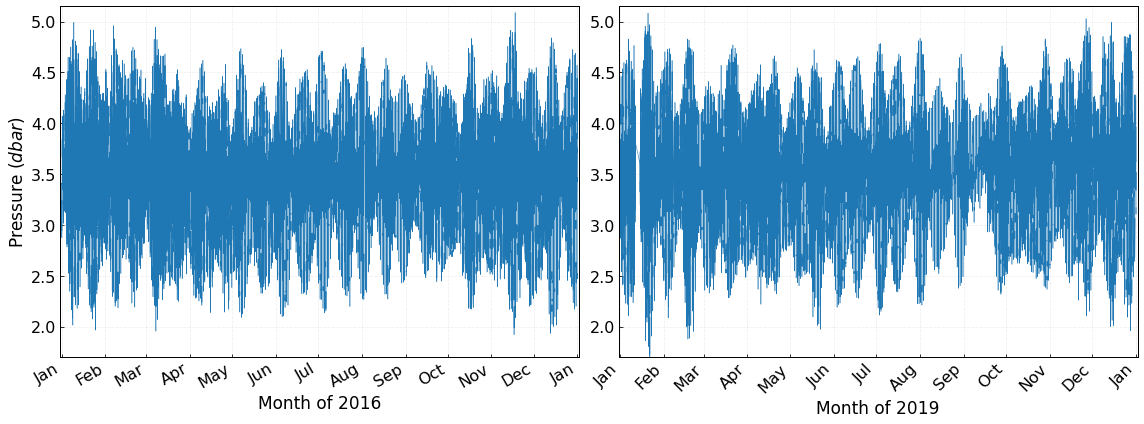

In [88]:
fig,axes = plt.subplots(1,2,figsize=(16,6))

pres_2016.plot(ax=axes[0],lw=0.5)
pres_2019.plot(ax=axes[1],lw=0.5)

for ax in axes.flatten():
    [x.set_linewidth(1) for x in ax.spines.values()]
    ax.tick_params(axis='both', which='both', direction='in', labelsize=16)
    ax.set_title('')
    locator = mdates.MonthLocator()  # every month
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
    ax.xaxis.set_major_locator(locator)
    ax.margins(x=0.003)
    ax.grid(alpha=0.2,ls='--')
    ax.set_ylim(1.7,5.15)

axes[0].set_ylabel('Pressure ($dbar$)',fontsize=17)
axes[1].set_ylabel('',fontsize=17)
axes[0].set_xlabel('Month of 2016',fontsize=17)
axes[1].set_xlabel('Month of 2019',fontsize=17)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

I have plotted pressure during 2016 and 2019. The two plots look relatively similar. There appears to be a data gap in January of 2019, whereas there is no obvious data gap during 2016. Also, there is a period of low variability in mid-September 2019, whereas variability is stronger during this period in 2016. In both years, it seems that variability of pressure in the summer is lower than in the winter. 

## Temperature

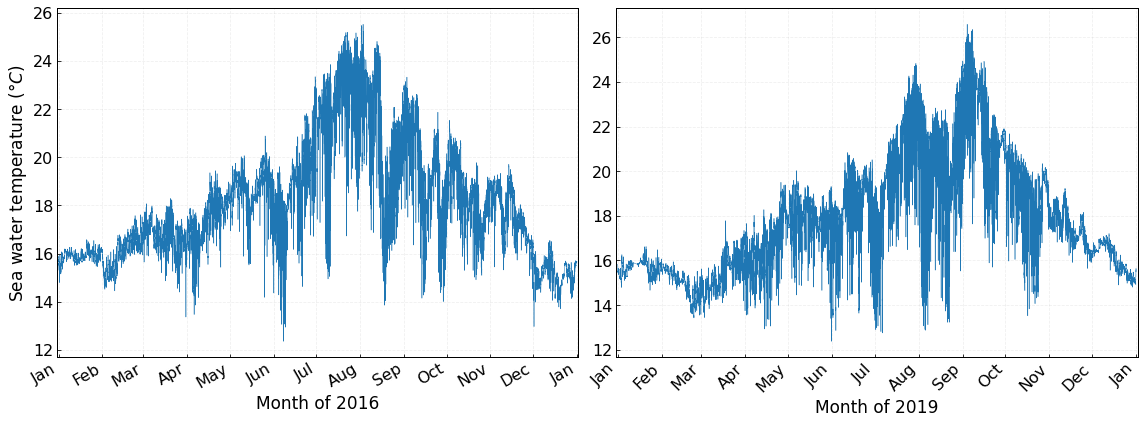

In [89]:
fig,axes = plt.subplots(1,2,figsize=(16,6))

sst_2016.plot(ax=axes[0],lw=0.5)
sst_2019.plot(ax=axes[1],lw=0.5)

for ax in axes.flatten():
    [x.set_linewidth(1) for x in ax.spines.values()]
    ax.tick_params(axis='both', which='both', direction='in', labelsize=16)
    ax.set_title('')
    locator = mdates.MonthLocator()  # every month
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
    ax.xaxis.set_major_locator(locator)
    ax.margins(x=0.003)
    ax.grid(alpha=0.2,ls='--')
    #ax.set_ylim(1.7,5.15)

axes[0].set_ylabel('Sea water temperature ($\degree C$)',fontsize=17)
axes[1].set_ylabel('',fontsize=17)
axes[0].set_xlabel('Month of 2016',fontsize=17)
axes[1].set_xlabel('Month of 2019',fontsize=17)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Again, the two plots look quite similar, with both generally showing warmer SSTs in the summer and cooler SSTs in the winter. 2019 seems to have colder spikes than 2016, particularly in the summer where SSTs dip to ~13°C a few times. The peak of SSTs in summer 2016 is smoother than in summer 2019, where there is an initial peak in late July / early August as well as a secondary peak later in September. Also, the decline of SSTs from fall into winter during 2019 is much more consistent than in 2016, where SSTs seem to hover around the same value from late September until mid November.

# Means

## Pressure

In [188]:
def std_error(da,method):
    if method == 'mean':
        return da.std().data/np.sqrt(len(da))
    elif method == 'variance':
        return (da.std().data**2)*np.sqrt(2/(len(da)-1))

pres_2016_mean = pres_2016.mean().data
pres_2019_mean = pres_2019.mean().data

pres_2016_std_error = std_error(pres_2016,method='mean')
pres_2019_std_error = std_error(pres_2019,method='mean')

print ('The mean pressure during 2016 was {:.2f} ± {:.4f} dbar.'.format(pres_2016_mean,pres_2016_std_error))
print ('The mean pressure during 2019 was {:.2f} ± {:.4f} dbar.'.format(pres_2019_mean,pres_2019_std_error))

The mean pressure during 2016 was 3.46 ± 0.0016 dbar.
The mean pressure during 2019 was 3.50 ± 0.0014 dbar.


The mean pressure during 2016 and 2019 are not consistent with each other between their error bars. Let's try subsampling the data at one measurement per day (taking the first data point from each day):

In [184]:
pres_2016_daily = pres_2016.sortby('time').resample(time='1D').first()
pres_2019_daily = pres_2019.sortby('time').resample(time='1D').first()

pres_2016_daily_mean = pres_2016_daily.mean().data
pres_2019_daily_mean = pres_2019_daily.mean().data

pres_2016_daily_std_error = std_error(pres_2016_daily,method='mean')
pres_2019_daily_std_error = std_error(pres_2019_daily,method='mean')

print ('The mean pressure during 2016 from subsampled daily data was {:.2f} ± {:.3f} dbar.'.format(pres_2016_daily_mean,pres_2016_daily_std_error))
print ('The mean pressure during 2019 from subsampled daily data was {:.2f} ± {:.3f} dbar.'.format(pres_2019_daily_mean,pres_2019_daily_std_error))

The mean pressure during 2016 from subsampled daily data was 3.31 ± 0.025 dbar.
The mean pressure during 2019 from subsampled daily data was 3.34 ± 0.026 dbar.


Subsampling the data changes the means significantly. The original mean does not lie within the standard errors for the subsampled data for either year, which suggests we may be selecting correlated data with certain characteristics in the subsample (e.g. tides may tend to be in a certain phase at midnight UTC which could affect the pressure measured).

## Temperature

In [185]:
sst_2016_mean = sst_2016.mean().data
sst_2019_mean = sst_2019.mean().data

sst_2016_std_error = std_error(sst_2016,method='mean')
sst_2019_std_error = std_error(sst_2019,method='mean')

print ('The mean SST during 2016 was {:.2f} ± {:.4f} °C.'.format(sst_2016_mean,sst_2016_std_error))
print ('The mean SST during 2019 was {:.2f} ± {:.4f} °C.'.format(sst_2019_mean,sst_2019_std_error))

The mean SST during 2016 was 18.25 ± 0.0082 °C.
The mean SST during 2019 was 17.92 ± 0.0072 °C.


In [186]:
sst_2016_daily = sst_2016.sortby('time').resample(time='1D').first()
sst_2019_daily = sst_2019.sortby('time').resample(time='1D').first()

sst_2016_daily_mean = sst_2016_daily.mean().data
sst_2019_daily_mean = sst_2019_daily.mean().data

sst_2016_daily_std_error = std_error(sst_2016_daily,method='mean')
sst_2019_daily_std_error = std_error(sst_2019_daily,method='mean')

print ('The mean SST during 2016 from subsampled daily data was {:.2f} ± {:.3f} °C.'.format(sst_2016_daily_mean,sst_2016_daily_std_error))
print ('The mean SST during 2019 from subsampled daily data was {:.2f} ± {:.3f} °C.'.format(sst_2019_daily_mean,sst_2019_daily_std_error))

The mean SST during 2016 from subsampled daily data was 18.62 ± 0.134 °C.
The mean SST during 2019 from subsampled daily data was 18.47 ± 0.141 °C.


Again, the mean SST during 2016 and the mean SST during 2019 are not consistent within their respective error bars. This is likely due to long-term variability in SSTs such as ENSO. Also, the mean SST from subsampled daily data is significantly higher for both years than the mean from the original data. This is probably due to a diurnal cycle in SSTs. I believe that the subsamples I extracted are taken at midnight UTC (the datasets use Epoch time), so this is in the late afternoon in San Diego, which would explain why SSTs are higher than the original mean.

# Variance


## Pressure

In [190]:
pres_2016_variance = pres_2016.std().data**2
pres_2019_variance = pres_2019.std().data**2

pres_2016_variance_std_error = std_error(pres_2016,method='variance')
pres_2019_variance_std_error = std_error(pres_2019,method='variance')

print ('The variance in pressure during 2016 was {:.3f} ± {:.4f} dbar².'.format(pres_2016_variance,pres_2016_variance_std_error))
print ('The variance in pressure during 2019 was {:.3f} ± {:.4f} dbar².'.format(pres_2019_variance,pres_2019_variance_std_error))

The variance in pressure during 2016 was 0.244 ± 0.0011 dbar².
The variance in pressure during 2019 was 0.244 ± 0.0010 dbar².


The variance in pressure during 2016 and 2019 are consistent with each other. 

In [191]:
pres_2016_variance_daily = pres_2016_daily.std().data**2
pres_2019_variance_daily = pres_2019_daily.std().data**2

pres_2016_variance_daily_std_error = std_error(pres_2016_daily,method='variance')
pres_2019_variance_daily_std_error = std_error(pres_2019_daily,method='variance')

print ('The variance in pressure during 2016 from subsampled daily data was {:.3f} ± {:.4f} dbar².'.format(pres_2016_variance_daily,pres_2016_variance_daily_std_error))
print ('The variance in pressure during 2019 from subsampled daily data was {:.3f} ± {:.4f} dbar².'.format(pres_2019_variance_daily,pres_2019_variance_daily_std_error))

The variance in pressure during 2016 from subsampled daily data was 0.234 ± 0.0173 dbar².
The variance in pressure during 2019 from subsampled daily data was 0.243 ± 0.0180 dbar².


Subsampling the data at once per day does change the results slightly, but they are still consistent within their error bars.

## Temperature

In [197]:
sst_2016_variance = sst_2016.std().data**2
sst_2019_variance = sst_2019.std().data**2

sst_2016_variance_std_error = std_error(sst_2016,method='variance')
sst_2019_variance_std_error = std_error(sst_2019,method='variance')

print ('The variance in SSTs during 2016 was {:.2f} ± {:.3f}°C².'.format(sst_2016_variance,sst_2016_variance_std_error))
print ('The variance in SSTs during 2019 was {:.2f} ± {:.3f}°C².'.format(sst_2019_variance,sst_2019_variance_std_error))

The variance in SST during 2016 was 6.30 ± 0.029°C².
The variance in SST during 2019 was 6.66 ± 0.026°C².


The variance in SSTs during 2016 and 2019 are not consistent with each other. From the two years evaluated alone, this suggests that the variability of SSTs on a year-to-year basis can change more than the variability in pressure. This is likely because pressure is determined by more periodic / forced factors such as tides.

In [196]:
sst_2016_variance_daily = sst_2016_daily.std().data**2
sst_2019_variance_daily = sst_2019_daily.std().data**2

sst_2016_variance_daily_std_error = std_error(sst_2016_daily,method='variance')
sst_2019_variance_daily_std_error = std_error(sst_2019_daily,method='variance')

print ('The variance in SSTs during 2016 from subsampled daily data was {:.2f} ± {:.3f}°C².'.format(sst_2016_variance_daily,sst_2016_variance_daily_std_error))
print ('The variance in SSTs during 2019 from subsampled daily data was {:.2f} ± {:.3f}°C².'.format(sst_2019_variance_daily,sst_2019_variance_daily_std_error))

The variance in SST during 2016 from subsampled daily data was 6.53 ± 0.483°C².
The variance in SST during 2019 from subsampled daily data was 7.31 ± 0.542°C².


Using daily subsampled data, the variance between the two years is even less consistent. However, the reduction in sample size has increased the standard error of the variance, so they are actually now consistent with each other within their error bars. 

# Extreme values

## 2016

In [215]:
sst_2016_std = np.sqrt(sst_2016_variance)

# Observed PDF
prob_exceedance_observed = kde.integrate_box_1d(sst_2016_mean+3*sst_2016_std,100)
print ('For the 2016 observed PDF, the likelihood of a temperature extreme 3σ greater than the mean is {:.3f}%'.format(prob_exceedance_observed*100))

For the 2016 observed PDF, the likelihood of a temperature extreme 3σ greater than the mean is 0.003%


In [216]:
# Gaussian PDF
sst_2016_gaussian = stats.norm(sst_2016_mean, sst_2016_std)
cdf_val=sst_2016_gaussian.cdf(sst_2016_mean+3*sst_2016_std) # Value of Gaussian CDF at 3σ
prob_exceedance_gaussian = 1-cdf_val
print ('For the 2016 Gaussian PDF, the likelihood of a temperature extreme 3σ greater than the mean is {:.3f}%'.format(prob_exceedance_gaussian*100))

For the 2016 Gaussian PDF, the likelihood of a temperature extreme 3σ greater than the mean is 0.135%


## 2019

In [219]:
sst_2019_std = np.sqrt(sst_2019_variance)

# Observed PDF
prob_exceedance_observed = kde.integrate_box_1d(sst_2019_mean+3*sst_2019_std,100)
print ('For the 2019 observed PDF, the likelihood of a temperature extreme 3σ greater than the mean is {:.3f}%'.format(prob_exceedance_observed*100))

For the 2019 observed PDF, the likelihood of a temperature extreme 3σ greater than the mean is 0.008%


In [218]:
# Gaussian PDF
sst_2019_gaussian = stats.norm(sst_2019_mean, sst_2019_std)
cdf_val=sst_2019_gaussian.cdf(sst_2019_mean+3*sst_2019_std) # Value of Gaussian CDF at 3σ
prob_exceedance_gaussian = 1-cdf_val
print ('For the 2019 Gaussian PDF, the likelihood of a temperature extreme 3σ greater than the mean is {:.3f}%'.format(prob_exceedance_gaussian*100))

For the 2019 Gaussian PDF, the likelihood of a temperature extreme 3σ greater than the mean is 0.135%


We can see that the likelihood of a temperature extreme 3σ greater than the mean from the observed PDF is higher in 2019 than in 2016. This is because the two PDFs are different - perhaps the distribution in 2019 has a fatter tail than 2016. Note that the likelihood from the Gaussian PDF is the same for both years by definition.

# Probability density functions

## Pressure

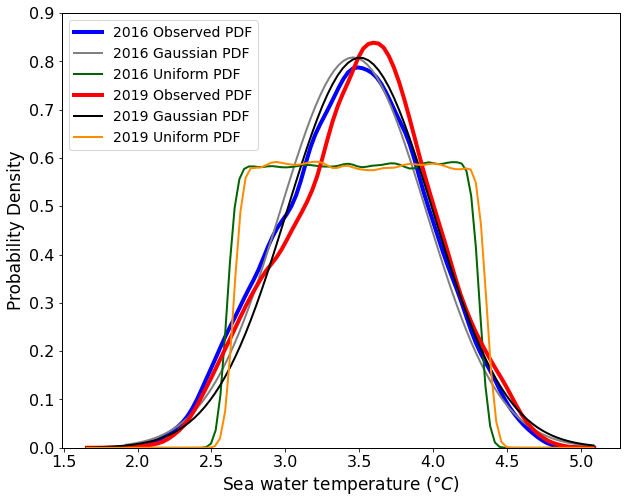

In [276]:
kde_pres_2016 = stats.gaussian_kde(pres_2016)
x_pres_2016 = np.linspace(pres_2016.min(), pres_2016.max(), 100)
p_pres_2016 = kde_pres_2016(x_pres_2016)

kde_pres_2019 = stats.gaussian_kde(pres_2019) 
x_pres_2019 = np.linspace(pres_2019.min(), pres_2019.max(), 100)
p_pres_2019 = kde_pres_2019(x_pres_2019)

pres_2016_gaussian_pdf = stats.norm.pdf(x_pres_2016,pres_2016.mean().data, pres_2016.std().data)
pres_2019_gaussian_pdf = stats.norm.pdf(x_pres_2019,pres_2019.mean().data, pres_2019.std().data)

def uniform_dist(da):
    a = da.mean().data - np.sqrt(12)/2*(da.std().data)
    b = da.mean().data + np.sqrt(12)/2*(da.std().data)
    return a,b

pres_2016_uniform = uniform_dist(pres_2016)
pres_2019_uniform = uniform_dist(pres_2019)

kde_pres_2016_uniform = stats.gaussian_kde(np.random.uniform(pres_2016_uniform[0],pres_2016_uniform[1],100000)) 
p_pres_2016_uniform = kde_pres_2016_uniform(x_pres_2016)

kde_pres_2019_uniform = stats.gaussian_kde(np.random.uniform(pres_2019_uniform[0],pres_2019_uniform[1],100000)) 
p_pres_2019_uniform = kde_pres_2019_uniform(x_pres_2019)

fig,ax = plt.subplots(1,1,figsize=(10,8))
[x.set_linewidth(1) for x in ax.spines.values()]
ax.plot(x_pres_2016,p_pres_2016,c='blue',lw=4,label='2016 Observed PDF')
ax.plot(x_pres_2016,pres_2016_gaussian_pdf,c='grey',lw=2,label='2016 Gaussian PDF')
ax.plot(x_pres_2016,p_pres_2016_uniform,c='darkgreen',lw=2,ls='-',label='2016 Uniform PDF')
ax.plot(x_pres_2019,p_pres_2019,c='red',lw=4,label='2019 Observed PDF')
ax.plot(x_pres_2019,pres_2019_gaussian_pdf,c='black',lw=2,label='2019 Gaussian PDF')
ax.plot(x_pres_2019,p_pres_2019_uniform,c='darkorange',lw=2,ls='-',label='2019 Uniform PDF')
ax.set_ylim(0,0.9)
ax.legend(fontsize=14,loc=2)
ax.set_ylabel('Probability Density',fontsize=17)
ax.set_xlabel('Sea water temperature ($\degree C$)',fontsize=17)
ax.tick_params(axis='both', which='both', direction='out', labelsize=16)

## Temperature

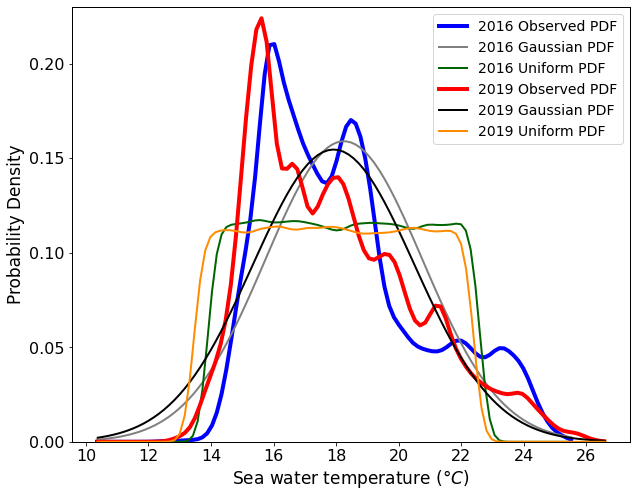

In [277]:
kde_sst_2016 = stats.gaussian_kde(sst_2016) 
x_sst_2016 = np.linspace(sst_2016.min()-2, sst_2016.max(), 100)
p_sst_2016 = kde_sst_2016(x_sst_2016)

kde_sst_2019 = stats.gaussian_kde(sst_2019) 
x_sst_2019 = np.linspace(sst_2019.min()-2, sst_2019.max(), 100)
p_sst_2019 = kde_sst_2019(x_sst_2019)

sst_2016_gaussian_pdf = stats.norm.pdf(x_sst_2016,sst_2016.mean().data, sst_2016.std().data)
sst_2019_gaussian_pdf = stats.norm.pdf(x_sst_2019,sst_2019.mean().data, sst_2019.std().data)

def uniform_dist(da):
    a = da.mean().data - np.sqrt(12)/2*(da.std().data)
    b = da.mean().data + np.sqrt(12)/2*(da.std().data)
    return a,b

sst_2016_uniform = uniform_dist(sst_2016)
sst_2019_uniform = uniform_dist(sst_2019)

kde_sst_2016_uniform = stats.gaussian_kde(np.random.uniform(sst_2016_uniform[0],sst_2016_uniform[1],100000)) 
p_sst_2016_uniform = kde_sst_2016_uniform(x_sst_2016)

kde_sst_2019_uniform = stats.gaussian_kde(np.random.uniform(sst_2019_uniform[0],sst_2019_uniform[1],100000)) 
p_sst_2019_uniform = kde_sst_2019_uniform(x_sst_2019)

fig,ax = plt.subplots(1,1,figsize=(10,8))
[x.set_linewidth(1) for x in ax.spines.values()]
ax.plot(x_sst_2016,p_sst_2016,c='blue',lw=4,label='2016 Observed PDF')
ax.plot(x_sst_2016,sst_2016_gaussian_pdf,c='grey',lw=2,label='2016 Gaussian PDF')
ax.plot(x_sst_2016,p_sst_2016_uniform,c='darkgreen',lw=2,ls='-',label='2016 Uniform PDF')
ax.plot(x_sst_2019,p_sst_2019,c='red',lw=4,label='2019 Observed PDF')
ax.plot(x_sst_2019,sst_2019_gaussian_pdf,c='black',lw=2,label='2019 Gaussian PDF')
ax.plot(x_sst_2019,p_sst_2019_uniform,c='darkorange',lw=2,ls='-',label='2019 Uniform PDF')
ax.set_ylim(0,0.23)
ax.legend(fontsize=14)
ax.set_ylabel('Probability Density',fontsize=17)
ax.set_xlabel('Sea water temperature ($\degree C$)',fontsize=17)
ax.tick_params(axis='both', which='both', direction='out', labelsize=16)

# Variance reduction by averaging

In [ ]:
# Try every 2 hours, 4 hours, 8 hours, 16 hours, etc.
# How does standard error of mean reduce as sample size N increases

Whoops, ran out of time for this, sorry!